# **The fifth in-class-exercise (40 points in total, 11/17/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
# Write your code here 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stsa-train.txt to stsa-train.txt


In [ ]:
train_data = pd.read_csv('stsa-train.txt',sep = 'delimiter=',header= None,names=['reviews'])
train_data[['sentiment','reviews']] = train_data['reviews'].str.split(" ", 1, expand=True)
train_data.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,reviews,sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
5,campanella gets the tone just right -- funny i...,1
6,a fan film that for the uninitiated plays bett...,0
7,"béart and berling are both superb , while hupp...",1
8,"a little less extreme than in the past , with ...",0
9,the film is strictly routine .,0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stsa-test.txt to stsa-test.txt


In [ ]:
test_data = pd.read_csv('stsa-test.txt',sep = 'delimiter=',header= None,names=['reviews'])
test_data[['sentiment','reviews']] = test_data['reviews'].str.split(" ", 1, expand=True)
test_data.head(10)

,reviews,sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1
5,take care of my cat offers a refreshingly diff...,1
6,"acting , particularly by tambor , almost makes...",0
7,the movie exists for its soccer action and its...,1
8,arnold 's jump from little screen to big will ...,0
9,if this holiday movie is supposed to be a gift...,0


In [ ]:
import nltk
nltk.download()
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


test_data['cleanText']=test_data['reviews'].map(lambda s:preprocess(s)) 
test_data.head()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Package bllip_wsj_no_aux is already up-to-date!
       | Downloading package book_grammars to /root/nltk_data..


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


,reviews,sentiment,cleanText
0,"no movement , no yuks , not much of anything .",0,movement yuks much anything
1,"a gob of drivel so sickly sweet , even the eag...",0,gob drivel sickly sweet even eager consumers m...
2,"gangs of new york is an unapologetic mess , wh...",0,gangs new york unapologetic mess whose saving ...
3,"we never really feel involved with the story ,...",0,never really feel involved story ideas remain ...
4,this is one of polanski 's best films .,1,one polanski best films


In [ ]:
train_data['cleanText']=train_data['reviews'].map(lambda s:preprocess(s)) 
train_data.head()

,reviews,sentiment,cleanText
0,"a stirring , funny and finally transporting re...",1,stirring funny finally transporting imagining ...
1,apparently reassembled from the cutting-room f...,0,apparently reassembled cutting room floor give...
2,they presume their audience wo n't sit still f...,0,presume audience sit still sociology lesson ho...
3,this is a visually stunning rumination on love...,1,visually stunning rumination love memory histo...
4,jonathan parker 's bartleby should have been t...,1,jonathan parker bartleby end modern office ano...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer(lowercase = False, analyzer='word')
train_tfidf = tfidf_vectorizer.fit_transform(train_data["cleanText"]).toarray()
test_tfidf = tfidf_vectorizer.transform(test_data["cleanText"]).toarray()
x_test = test_tfidf
y_test = test_data["sentiment"]
x_train, x_test, y_train, y_test = train_test_split(train_tfidf,train_data["sentiment"],test_size = 0.2, random_state = 202)

In [ ]:
#MultinomialNB
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
# Model fit using .fit()
model_mnb = mnb.fit(x_train,y_train)
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=10)
print("MultinominalNB score: ",scores.mean())

Accuracy 0.7946183415705657
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       912
           1       0.75      0.88      0.81       909

    accuracy                           0.79      1821
   macro avg       0.80      0.79      0.79      1821
weighted avg       0.80      0.79      0.79      1821

MultinominalNB score:  0.7259742989251186


In [ ]:
#SVM
from sklearn.svm import LinearSVC
svm = LinearSVC()
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))
print(classification_report(y_test,y_pred_svm))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, x_test, y_test, cv=10)
print("SVM score:",scores.mean())

Accuracy 0.7880285557386052
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       912
           1       0.78      0.81      0.79       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821

SVM score: 0.7078604455653636


In [ ]:
#KNeighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
model_knn = knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_knn,y_test))
print(classification_report(y_test,y_pred_knn))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x_test, y_test, cv=10)
print("KNN score:",scores.mean())

Accuracy 0.5112575507962658
              precision    recall  f1-score   support

           0       0.51      0.72      0.60       912
           1       0.52      0.30      0.38       909

    accuracy                           0.51      1821
   macro avg       0.51      0.51      0.49      1821
weighted avg       0.51      0.51      0.49      1821

KNN score: 0.5008226745931663


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_dt = dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_dt,y_test))
print(classification_report(y_test,y_pred_dt))
scores = cross_val_score(dt, x_test, y_test, cv=10)
print("Decision tree score:",scores.mean())

Accuracy 0.6666666666666666
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       912
           1       0.68      0.63      0.65       909

    accuracy                           0.67      1821
   macro avg       0.67      0.67      0.67      1821
weighted avg       0.67      0.67      0.67      1821

Decision tree score: 0.6073710442562901


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_rf = rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_rf,y_test))
print(classification_report(y_test,y_pred_rf))
cores = cross_val_score(rf, x_test, y_test, cv=10)
print("Random forest score",scores.mean())

Accuracy 0.7484898407468424
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       912
           1       0.76      0.73      0.74       909

    accuracy                           0.75      1821
   macro avg       0.75      0.75      0.75      1821
weighted avg       0.75      0.75      0.75      1821



In [ ]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_xgb = xgb.fit(x_train,y_train)
y_pred_xgb = model_xgb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_xgb,y_test))
print(classification_report(y_test,y_pred_xgb))
scores = cross_val_score(xgb, x_test, y_test, cv=10)
print("XGBoost score:",scores.mean())

Accuracy 0.642504118616145
              precision    recall  f1-score   support

           0       0.74      0.45      0.56       912
           1       0.60      0.84      0.70       909

    accuracy                           0.64      1821
   macro avg       0.67      0.64      0.63      1821
weighted avg       0.67      0.64      0.63      1821

XGBoost score: 0.6167147060589684


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [1]:
#Write your code here.
from google.colab import files
uploaded = files.upload()

Saving Amazon_Unlocked_Mobile.csv to Amazon_Unlocked_Mobile (2).csv


In [2]:
import pandas as pd
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


               Price         Rating   Review Votes
count  407907.000000  413840.000000  401544.000000
mean      226.867155       3.819578       1.507237
std       273.006259       1.548216       9.163853
min         1.730000       1.000000       0.000000
25%        79.990000       3.000000       0.000000
50%       144.710000       5.000000       0.000000
75%       269.990000       5.000000       1.000000
max      2598.000000       5.000000     645.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB
None


       

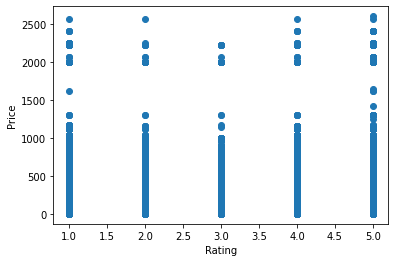

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
def split_data(df):
    #split data
    train, validate = train_test_split(data, test_size=0.2, random_state=42)
    return train, validate

def descriptive_analysis(df):
    #descriptive analysis
    print(df.describe())
    print('\n')
    print(df.info())
    print('\n')
    print(df.head())
    print('\n')
    print(df.columns)
    print('\n')
    print(df.shape)
    print('\n')
    print(df.dtypes)
    print('\n')
    print(df.isnull().sum())
    print('\n')
    print(df.isnull().sum().sum())
    print('\n')
descriptive_analysis(df)
plt.scatter(df['Rating'], df['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

def data_plotting(df):
    #data plotting
    sns.set(style="whitegrid")
    sns.set(font_scale=1.5)
    sns.countplot(x="label", df=df)
    plt.show()

    sns.set(style="whitegrid")
def clustering_methods(train, validate):
    #clustering methods
    from sklearn.cluster import KMeans
    from sklearn.cluster import DBSCAN
    #Hierarchical clustering
    from scipy.cluster.hierarchy import linkage, dendrogram
    from scipy.cluster.hierarchy import fcluster

    #K means
    kmeans = KMeans(n_clusters=3, random_state=0).fit(train['Price'])
    kmeans_pred = kmeans.predict(validate['Price'])
    kmeans_accuracy = accuracy_score(validate['label'], kmeans_pred)
    kmeans_recall = recall_score(validate['label'], kmeans_pred)
    kmeans_precision = precision_score(validate['label'], kmeans_pred)
    kmeans_f1 = f1_score(validate['label'], kmeans_pred)
    print('K means')
    print('Accuracy:', kmeans_accuracy)
    print('Recall:', kmeans_recall)
    print('Precision:', kmeans_precision)
    print('F1 score:', kmeans_f1)
    print('\n')

    #DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5).fit(train['Price'])
    dbscan_pred = dbscan.predict(validate['Price'])
    dbscan_accuracy = accuracy_score(validate['label'], dbscan_pred)
    dbscan_recall = recall_score(validate['label'], dbscan_pred)
    dbscan_precision = precision_score(validate['label'], dbscan_pred)
    dbscan_f1 = f1_score(validate['label'], dbscan_pred)
    print('DBSCAN')
    print('Accuracy:', dbscan_accuracy)
    print('Recall:', dbscan_recall)
    print('Precision:', dbscan_precision)
    print('F1 score:', dbscan_f1)
    print('\n')

    #Hierarchical clustering
    Z = linkage(train['Price'], 'ward')
    plt.figure(figsize=(25, 10))
    dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=train['label'])
    plt.show()
def run():
    output = clustering_methods(split_data(train_data)[0], split_data(test_data)[0])
    return output

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

#You can write you answer here. (No code needed)
K means is a type of unsupervised learning technique used to find data clusters.
DBSCAN is a method for unsupervised learning that is used to find clusters that are not necessarily connected. 
Hierarchical clustering is a sort of supervised learning a process for building a group hierarchy tree.
The groupings at the base of the tree are called clusters, while the groupings above them are called superclusters. 
Members of each category in the hierarchy are related to one another. 
This similarity is determined using a similarity matrix, which is a set of values that quantify the similarity between two objects. 
Hierarchical clustering is widely used to identify groups that are similar to one another. It is also used to establish a group hierarchy.